Number of epochs needed for convergence with Bi-Polar Step activation: 1001
Number of epochs needed for convergence with Sigmoid activation: 1001
Number of epochs needed for convergence with ReLU activation: 391


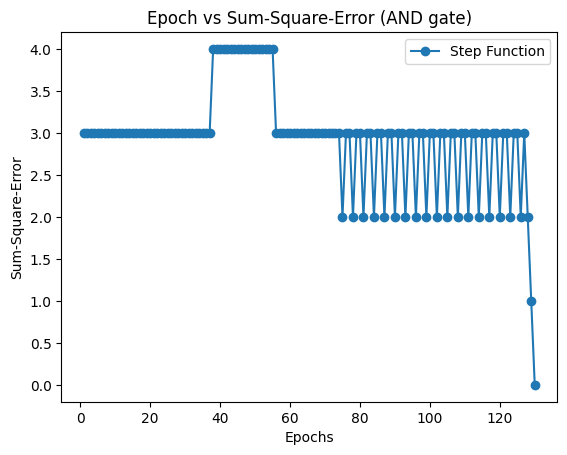

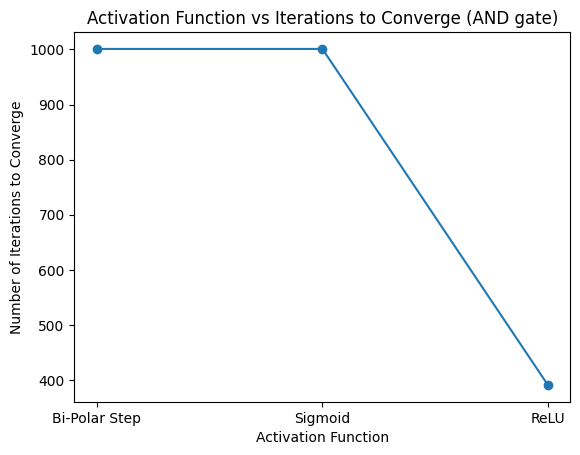

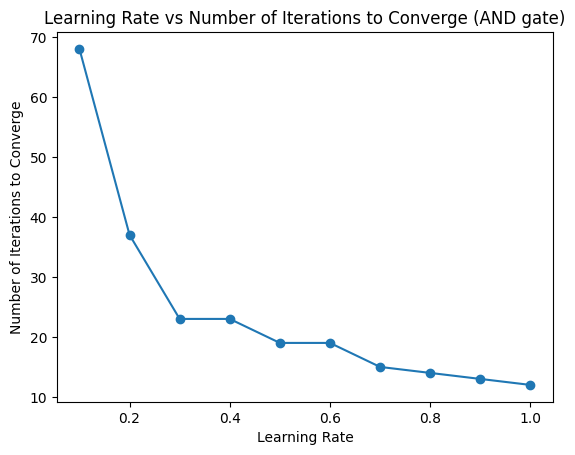

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Step Activation Function
def step_function(x):
    return 1 if x >= 0 else 0

# Perceptron Function
def perceptron(input_values, weights):
    # Add the bias input (always 1)
    inputs = np.insert(input_values, 0, 1)
    # Calculate the weighted sum
    weighted_sum = np.dot(inputs, weights)
    # Apply the step activation function
    output = step_function(weighted_sum)
    return output

# Train the Perceptron for AND gate logic and track the error
def train_and_gate_per(initial_weights, learning_rate):
    # Training data for AND gate
    training_data = [
        ([0, 0], 0),
        ([0, 1], 0),
        ([1, 0], 0),
        ([1, 1], 1)
    ]

    # Maximum number of iterations
    max_iterations = 1000
    error_history = []

    # Initialize weights
    weights = np.array(initial_weights)

    for epoch in range(1, max_iterations + 1):
        epoch_error = 0
        for input_values, target_output in training_data:
            # Calculate the predicted output
            predicted_output = perceptron(input_values, weights)
            # Update the weights using the perceptron learning rule
            error = target_output - predicted_output
            weights += learning_rate * error * np.array([1] + input_values)

            # Calculate sum-square-error
            epoch_error += error**2
        error_history.append(epoch_error)

        # Check for convergence
        if epoch_error <= 0.002:
            break

    return weights, error_history, epoch

# A1: Train with Step activation function
initial_weights_a1 = [10, 0.2, -0.75]
learning_rate_a1 = 0.05
trained_weights_a1, error_history_a1, converge_a1 = train_and_gate_per(initial_weights_a1, learning_rate_a1)
# Print the number of epochs needed for convergence with different activation functions
for activation_name, converge_epochs in zip([activation_name for activation_name, _ in activation_functions_a2], converge_epochs_a2):
    print(f"Number of epochs needed for convergence with {activation_name} activation: {converge_epochs}")

# A2: Repeat A1 experiment with different activation functions
def bipolar_step_function(x):
    return -1 if x < 0 else 1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

activation_functions_a2 = [
    ("Bi-Polar Step", bipolar_step_function),
    ("Sigmoid", sigmoid_function),
    ("ReLU", relu_function)
]

converge_epochs_a2 = []
iterations_to_converge_a2 = []

for activation_name, activation_func in activation_functions_a2:
    def custom_perceptron(input_values, weights):
        inputs = np.insert(input_values, 0, 1)
        weighted_sum = np.dot(inputs, weights)
        output = activation_func(weighted_sum)
        return output

    def custom_train_and_gate_per(initial_weights, learning_rate):
        weights = np.array(initial_weights)
        max_iterations = 1000  # Define max_iterations here
        training_data = [
            ([0, 0], 0),
            ([0, 1], 0),
            ([1, 0], 0),
            ([1, 1], 1)
        ]
        for epoch in range(1, max_iterations + 1):
            epoch_error = 0
            for input_values, target_output in training_data:
                predicted_output = custom_perceptron(input_values, weights)
                error = target_output - predicted_output
                weights += learning_rate * error * np.array([1] + input_values)
                epoch_error += error ** 2

            if epoch_error <= 0.002:
                break

        return epoch + 1

    converge_a2 = custom_train_and_gate_per(initial_weights_a1, learning_rate_a1)
    converge_epochs_a2.append(converge_a2)
    iterations_to_converge_a2.append(converge_a2)

# A3: Repeat A1 experiment with varying learning rates
learning_rates_a3 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iterations_taken_a3 = []

for learning_rate_a3 in learning_rates_a3:
    _, _, converge_a3 = train_and_gate_per(initial_weights_a1, learning_rate_a3)
    iterations_taken_a3.append(converge_a3)

# Plot epochs against the error values
epochs_a1 = range(1, converge_a1 + 1)
plt.plot(epochs_a1, error_history_a1, marker='o', label='Step Function')
plt.title('Epoch vs Sum-Square-Error (AND gate)')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.legend()
plt.show()

# Plot iterations to converge against activation functions
plt.plot([activation_name for activation_name, _ in activation_functions_a2], iterations_to_converge_a2, marker='o')
plt.title('Activation Function vs Iterations to Converge (AND gate)')
plt.xlabel('Activation Function')
plt.ylabel('Number of Iterations to Converge')
plt.show()

# Plot number of iterations to converge against learning rates
plt.plot(learning_rates_a3, iterations_taken_a3, marker='o')
plt.title('Learning Rate vs Number of Iterations to Converge (AND gate)')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.show()


Converged at epoch 16
Number of epochs needed for convergence with Bi-Polar Step activation: 16
Number of epochs needed for convergence with Sigmoid activation: 10000
Number of epochs needed for convergence with ReLU activation: 10000


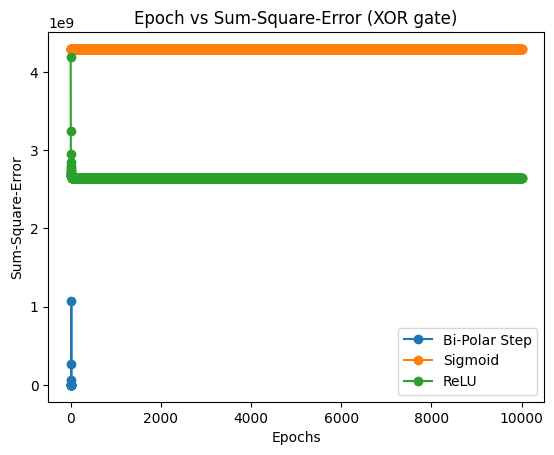

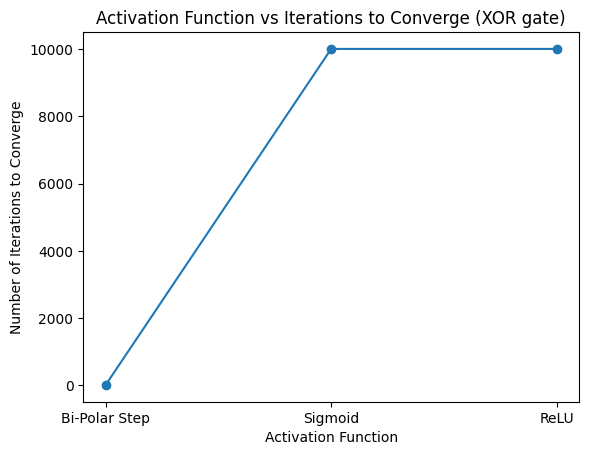

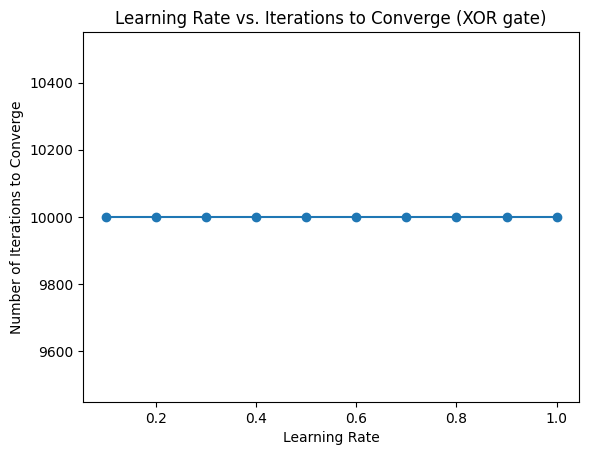

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Activation Functions
def step_function(x):
    return 1 if x >= 0 else 0

def bipolar_step_function(x):
    return -1 if x < 0 else 1

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

def relu_function(x):
    return max(0, x)

# Perceptron Class
class Perceptron:
    def __init__(self, input_size, activation_func):
        self.weights = np.random.rand(input_size + 1)  # +1 for the bias
        self.activation_func = activation_func

    def perceptron(self, input_values):
        inputs = np.insert(input_values, 0, 1)
        weighted_sum = np.dot(inputs, self.weights)
        return self.activation_func(weighted_sum)

    def train(self, inputs, targets, learning_rate=0.1, max_epochs=10000, error_threshold=0.002):
        error_history = []

        for epoch in range(max_epochs):
            total_error = 0
            for input_values, target_output in zip(inputs, targets):
                if self.activation_func == bipolar_step_function:
                    target_output *= 2  # Convert 0 to -1 for bipolar step function

                predicted_output = self.perceptron(input_values)
                error = target_output - predicted_output
                self.weights += learning_rate * error * np.insert(input_values, 0, 1)

                total_error += np.sum(error**2) / 2

            error_history.append(total_error)

            if total_error <= error_threshold:
                print(f"Converged at epoch {epoch + 1}")
                break

        return error_history, epoch + 1

# XOR gate data
inputs_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets_xor = np.array([[0], [1], [1], [0]])

# Common parameters (same as AND gate)
input_size_xor = 2
output_size_xor = 1
learning_rate_xor = 0.1

# Activation functions to be tested
activation_functions_xor = [
    ("Bi-Polar Step", bipolar_step_function),
    ("Sigmoid", sigmoid_function),
    ("ReLU", relu_function)
]

# Lists to store convergence information
converge_epochs_xor = []
iterations_to_converge_xor = []

# Repeat training with different activation functions for XOR gate
for activation_name, activation_func in activation_functions_xor:
    perceptron_xor = Perceptron(input_size_xor, activation_func)
    error_history_xor, converge_xor = perceptron_xor.train(inputs_xor, targets_xor)

    # Ensure both lists have the same length
    if len(error_history_xor) < converge_xor:
        error_history_xor.append(error_history_xor[-1])

    # Append convergence information
    converge_epochs_xor.append(converge_xor)
    iterations_to_converge_xor.append(len(error_history_xor))

    # Plot the error history for each activation function
    epochs_xor = range(1, converge_xor + 1)
    plt.plot(epochs_xor, error_history_xor, marker='o', label=activation_name)

    # Print the number of epochs needed for convergence
    print(f"Number of epochs needed for convergence with {activation_name} activation: {converge_xor}")

# Plot XOR gate error history for different activation functions
plt.title('Epoch vs Sum-Square-Error (XOR gate)')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.legend()
plt.show()

# Plot iterations to converge against activation functions
plt.plot([activation_name for activation_name, _ in activation_functions_xor], iterations_to_converge_xor, marker='o')
plt.title('Activation Function vs Iterations to Converge (XOR gate)')
plt.xlabel('Activation Function')
plt.ylabel('Number of Iterations to Converge')
plt.show()
# Lists to store convergence information for learning rate vs. iterations
learning_rates_to_converge = []

# Repeat training with different learning rates for XOR gate
for learning_rate_xor in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    perceptron_xor = Perceptron(input_size_xor, sigmoid_function)
    _, converge_xor = perceptron_xor.train(inputs_xor, targets_xor, learning_rate=learning_rate_xor)

    # Append convergence information
    learning_rates_to_converge.append(converge_xor)

# Plot learning rate vs. iterations to converge for XOR gate
plt.plot([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], learning_rates_to_converge, marker='o')
plt.title('Learning Rate vs. Iterations to Converge (XOR gate)')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.show()




In [3]:
import numpy as np

# Activation Function (Sigmoid)
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

# Perceptron Class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        # Initialize weights with small random values
        self.weights = np.random.rand(input_size + 1)
        self.learning_rate = learning_rate

    def perceptron(self, input_values):
        inputs = np.insert(input_values, 0, 1)  # Insert bias input
        weighted_sum = np.dot(inputs, self.weights)
        return sigmoid_function(weighted_sum)

    def train(self, inputs, targets, max_epochs=1000, error_threshold=0.01):
        for epoch in range(max_epochs):
            total_error = 0
            for input_values, target_output in zip(inputs, targets):
                predicted_output = self.perceptron(input_values)
                error = target_output - predicted_output
                self.weights += self.learning_rate * error * np.insert(input_values, 0, 1)

                total_error += np.abs(error)

            # Check for convergence
            if total_error <= error_threshold:
                print(f"Converged at epoch {epoch + 1}")
                break

        return epoch + 1

# Calculate weights using the matrix pseudo-inverse
def calculate_weights_pseudo_inverse(inputs, targets):
    inputs = np.insert(inputs, 0, 1, axis=1)  # Insert bias input
    pseudo_inverse = np.linalg.pinv(inputs)
    weights_pseudo_inverse = np.dot(pseudo_inverse, targets)
    return weights_pseudo_inverse.flatten()

# Customer data
customer_data = np.array([
    [20, 6, 3, 236, 1],    # High Value
    [16, 3, 2, 289, 1],    # High Value
    [27, 6, 2, 393, 1],    # High Value
    [19, 1, 2, 110, 0],    # Low Value
    [24, 4, 2, 280, 1],    # High Value
    [22, 1, 5, 167, 0],    # Low Value
    [15, 4, 2, 271, 1],    # High Value
    [18, 4, 2, 274, 1],    # High Value
    [21, 1, 1, 148, 0],    # Low Value
    [16, 2, 4, 198, 0]     # Low Value
])

# Separate features and labels
features = customer_data[:, :-1]
labels = customer_data[:, -1]

# Normalize features (optional)
features_normalized = features / features.max(axis=0)

# Initialize and train the perceptron
input_size = features.shape[1]
perceptron_model = Perceptron(input_size)
epochs_to_converge = perceptron_model.train(features_normalized, labels)

# Calculate weights using the matrix pseudo-inverse
weights_pseudo_inverse = calculate_weights_pseudo_inverse(features_normalized, labels)

# Print the results
print("Weights after training with perceptron:", perceptron_model.weights)
print("Weights obtained with matrix pseudo-inverse:", weights_pseudo_inverse)
print("Number of epochs needed to converge with perceptron:", epochs_to_converge)


Weights after training with perceptron: [-4.37370475 -2.9912309  11.4424158  -5.47547908  7.55045861]
Weights obtained with matrix pseudo-inverse: [ 0.3054393  -0.79682966  0.90626202 -0.38507753  0.97685495]
Number of epochs needed to converge with perceptron: 1000


In [3]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Input data for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output data for AND gate
y = np.array([[1], [1], [1], [1]])  # Output O1

# Set the seed for reproducibility
np.random.seed(42)

# Initialize weights and biases
input_size = 2
hidden_size = 2
output_size = 1
learning_rate = 0.05
epochs = 1000

# Initialize weights and biases for the connections
weights_AV = 2 * np.random.random((input_size, hidden_size)) - 1
biases_H = np.zeros((1, hidden_size))

weights_HW = 2 * np.random.random((hidden_size, output_size)) - 1
biases_O = np.zeros((1, output_size))

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    input_layer = X
    hidden_layer_input = np.dot(input_layer, weights_AV) + biases_H
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_HW) + biases_O
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output

    # Backward pass
    d_output = error * sigmoid_derivative(output_layer_output)
    d_hidden = d_output.dot(weights_HW.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_HW += learning_rate * hidden_layer_output.T.dot(d_output)
    biases_O += learning_rate * np.sum(d_output, axis=0, keepdims=True)

    weights_AV += learning_rate * input_layer.T.dot(d_hidden)
    biases_H += learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    # Check for convergence
    if np.mean(np.abs(error)) <= 0.002:
        print(f"Converged at epoch {epoch + 1}")
        break

# Print the final weights and biases
print("Final weights (A and B to H1 and H2):")
print(weights_AV)
print("Final biases (H1 and H2):")
print(biases_H)
print("Final weights (H1 and H2 to O1):")
print(weights_HW)
print("Final biases (O1):")
print(biases_O)

# Test the trained neural network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
hidden_layer_test = sigmoid(np.dot(test_input, weights_AV) + biases_H)
predicted_output = sigmoid(np.dot(hidden_layer_test, weights_HW) + biases_O)
print("Predicted output (O1):")
print(predicted_output)


Final weights (A and B to H1 and H2):
[[-0.28204143  0.90571103]
 [ 0.43385088  0.20378376]]
Final biases (H1 and H2):
[[-0.05630965  0.01899139]]
Final weights (H1 and H2 to O1):
[[0.4930148 ]
 [0.75929419]]
Final biases (O1):
[[2.38571437]]
Predicted output (O1):
[[0.95295823]
 [0.95689156]
 [0.95829626]
 [0.96149404]]


In [7]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Input data for the neural network
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output data for the neural network (as specified)
y = np.array([[1, 0], [1, 0], [0, 1], [0, 1]])

# Set the seed for reproducibility
np.random.seed(42)

# Initialize weights and biases
input_size = 2
hidden_size = 2
output_size = 2
learning_rate = 0.05
epochs = 1000

# Initialize weights and biases for the connections
weights_AV = 2 * np.random.random((input_size, hidden_size)) - 1
biases_H = np.zeros((1, hidden_size))

weights_HW = 2 * np.random.random((hidden_size, output_size)) - 1
biases_O = np.zeros((1, output_size))

# Training the neural network
for epoch in range(epochs):
    # Forward pass
    input_layer = X
    hidden_layer_input = np.dot(input_layer, weights_AV) + biases_H
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_HW) + biases_O
    output_layer_output = sigmoid(output_layer_input)

    # Calculate the error
    error = y - output_layer_output

    # Backward pass
    d_output = error * sigmoid_derivative(output_layer_output)
    d_hidden = d_output.dot(weights_HW.T) * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_HW += learning_rate * hidden_layer_output.T.dot(d_output)
    biases_O += learning_rate * np.sum(d_output, axis=0, keepdims=True)

    weights_AV += learning_rate * input_layer.T.dot(d_hidden)
    biases_H += learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    # Check for convergence
    if np.mean(np.abs(error)) <= 0.002:
        print(f"Converged at epoch {epoch + 1}")
        break

# Print the final weights and biases
print("Final weights (A and B to H1 and H2):")
print(weights_AV)
print("Final biases (H1 and H2):")
print(biases_H)
print("Final weights (H1 and H2 to O1 and O2):")
print(weights_HW)
print("Final biases (O1 and O2):")
print(biases_O)

# Test the trained neural network
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
hidden_layer_test = sigmoid(np.dot(test_input, weights_AV) + biases_H)
predicted_output = sigmoid(np.dot(hidden_layer_test, weights_HW) + biases_O)
print("Predicted output:")
print(predicted_output)


Final weights (A and B to H1 and H2):
[[-2.10375303  3.96190983]
 [ 0.38286602 -0.22060861]]
Final biases (H1 and H2):
[[ 0.52030698 -1.66654012]]
Final weights (H1 and H2 to O1 and O2):
[[ 1.37717272 -2.280622  ]
 [-3.52888714  3.29863049]]
Final biases (O1 and O2):
[[ 1.20429801 -0.6957057 ]]
Predicted output:
[[0.8186751  0.16769528]
 [0.84812887 0.13186159]
 [0.14589996 0.87131862]
 [0.16628104 0.84647412]]


In [8]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the AND gate truth table
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Create an MLPClassifier
mlp_and = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42)

# Train the model
mlp_and.fit(X_and, y_and)

# Test the model
test_data_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output_and = mlp_and.predict(test_data_and)

# Print the predicted output for the AND gate
print("Predicted output for AND gate:")
print(predicted_output_and)
# Define the XOR gate truth table
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create an MLPClassifier
mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), max_iter=1000, random_state=42)

# Train the model
mlp_xor.fit(X_xor, y_xor)

# Test the model
test_data_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output_xor = mlp_xor.predict(test_data_xor)

# Print the predicted output for the XOR gate
print("Predicted output for XOR gate:")
print(predicted_output_xor)


Predicted output for AND gate:
[0 0 0 1]
Predicted output for XOR gate:
[1 1 1 1]


c:\Users\91630\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load data from Excel
data = pd.read_excel(r"C:\Users\91630\OneDrive\Desktop\ml\training_mathbert 2.xlsx")

# Separate features and target variable
features = data.iloc[:, 0:383]
target = data.iloc[:, 384]
target = target.astype(int)
# Check unique values in target variable
print("Unique values in target variable:", target.unique())

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shapes and types of input data
print("X_train_scaled shape:", X_train_scaled.shape, "X_train_scaled dtype:", X_train_scaled.dtype)
print("y_train shape:", y_train.shape, "y_train dtype:", y_train.dtype)



Unique values in target variable: [0 1 2 3 4 5]
X_train_scaled shape: (788, 383) X_train_scaled dtype: float64
y_train shape: (788,) y_train dtype: int32


In [10]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
mlp_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = mlp_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.46449704142011833
